<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg._Area_Income              5000 non-null   float64
 1   Avg._Area_House_Age           5000 non-null   float64
 2   Avg._Area_Number_of_Rooms     5000 non-null   float64
 3   Avg._Area_Number_of_Bedrooms  5000 non-null   float64
 4   Area_Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


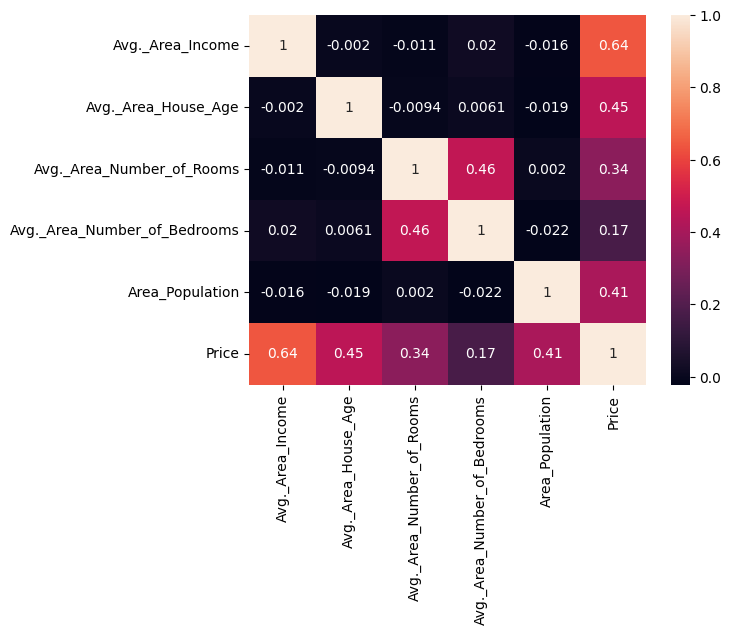

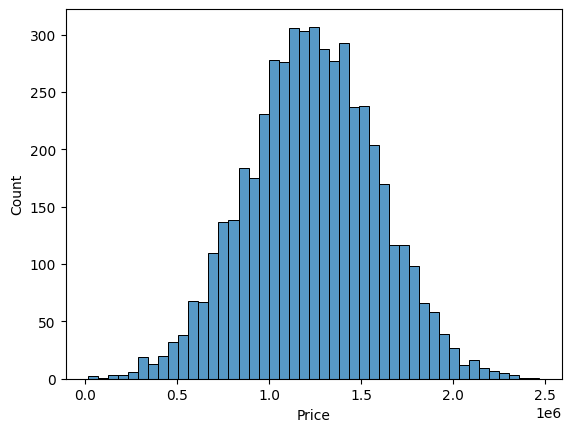

d:\Documents\Meus Documentos\Cursos\Escola DNC\Cientista de Dados\Cases\Estudos\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([3183762.92246551])

In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import os

# Definir o caminho relativo do arquivo
caminho_arquivo = os.path.join('..', 'Materiais', 'USA_Housing.csv')

# Carregar o arquivo CSV usando o pandas
base_casa = pd.read_csv(caminho_arquivo, sep=',')

# Exibir as primeiras 5 linhas do DataFrame para uma visualização inicial
base_casa.head()

# Exibir os nomes das colunas para verificar se há espaços ou caracteres especiais
base_casa.columns

# Modificar as colunas com espaços para um formato mais adequado
base_casa = base_casa.rename(columns={
    'Avg. Area Income': 'Avg._Area_Income', 
    'Avg. Area House Age': 'Avg._Area_House_Age', 
    'Avg. Area Number of Rooms': 'Avg._Area_Number_of_Rooms', 
    'Avg. Area Number of Bedrooms': 'Avg._Area_Number_of_Bedrooms', 
    'Area Population': 'Area_Population'
})

# Informações do DataFrame (tipos de dados e valores não nulos)
base_casa.info()

# Descrição estatística dos dados (média, desvio padrão, valores máximos e mínimos, etc.)
base_casa.describe()

# Remover a coluna 'Address', pois ela não é relevante para a análise
base_casa.drop(['Address'], axis=1, inplace=True)

# Criar o gráfico de caixa para a variável 'Avg._Area_Income'
fig1 = px.box(base_casa, x="Avg._Area_Income")
fig1.update_traces(marker=dict(color="blue"))

# Criar o gráfico de caixa para a variável 'Price'
fig2 = px.box(base_casa, x="Price")
fig2.update_traces(marker=dict(color="blue"))

# Criar subgráficos com 1 linha e 2 colunas
fig = make_subplots(rows=1, cols=2,  # 1 linha, 2 colunas
                    subplot_titles=("Gráfico de Caixa 1", "Gráfico de Caixa 2"))

# Adicionar os gráficos de caixa fig1 e fig2 aos subgráficos
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

# Atualizar o layout com o título
fig.update_layout(title_text="Gráficos de Caixa de `Avg._Area_Income` e `Price`")

# Mostrar o gráfico
fig.show()

# Calcular e exibir a correlação entre as variáveis numéricas
base_casa.corr()

# Seaborn heatmap para visualizar a correlação entre as variáveis
sns.heatmap(base_casa.corr(), annot=True)
plt.show()

# Seaborn histograma para analisar a distribuição dos preços
sns.histplot(base_casa['Price'])
plt.show()

# Definindo as variáveis independentes (X) e dependentes (Y) para o modelo de regressão
X = base_casa[['Avg._Area_Income', 'Avg._Area_House_Age', 'Avg._Area_Number_of_Rooms', 'Avg._Area_Number_of_Bedrooms', 'Area_Population']]
Y = base_casa[['Price']]

# Dividindo os dados em conjunto de treino e teste (70% treino, 30% teste)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

# Exibir as formas dos conjuntos de dados
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

# Criando o modelo de regressão linear
lm = LinearRegression()

# Treinando o modelo de regressão linear com os dados de treino
lm.fit(X_train, Y_train)

# Predizer valor na base de testes
y_pred = lm.predict(X_test)

# Calcular o coeficiente de determinação (R²) para avaliar o desempenho do modelo
r = r2_score(Y_test, y_pred)
r

# Premissa do professor - Entrada com valores fictícios para previsão
Avg_Area_Income = 50
Avg_Area_House_Age = 30
Avg_Area_Number_of_Rooms = 7
Avg_Area_Number_of_Bedrooms = 5
Avg_Population = 200

# Criar uma lista com os valores de entrada
entrada = [[Avg_Area_Income, Avg_Area_House_Age, Avg_Area_Number_of_Rooms, Avg_Area_Number_of_Bedrooms, Avg_Population]]

# Fazer a previsão com base nos valores de entrada
previsao = lm.predict(entrada)[0]

# Exibir o resultado da previsão
previsao
